In [1]:
%matplotlib inline
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../data/raw/arquivo_geral.csv', sep=';', parse_dates=['data'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 7 columns):
regiao              2214 non-null object
estado              2214 non-null object
data                2214 non-null datetime64[ns]
casosNovos          2214 non-null int64
casosAcumulados     2214 non-null int64
obitosNovos         2214 non-null int64
obitosAcumulados    2214 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 121.2+ KB


In [4]:
new_cases = df.groupby(['data']).agg({
    'casosNovos': 'sum'
})

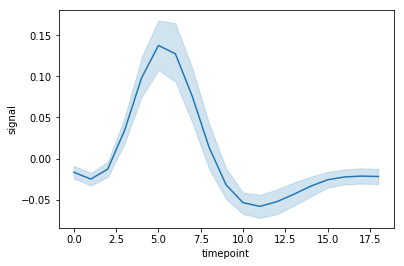

In [5]:
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

In [6]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


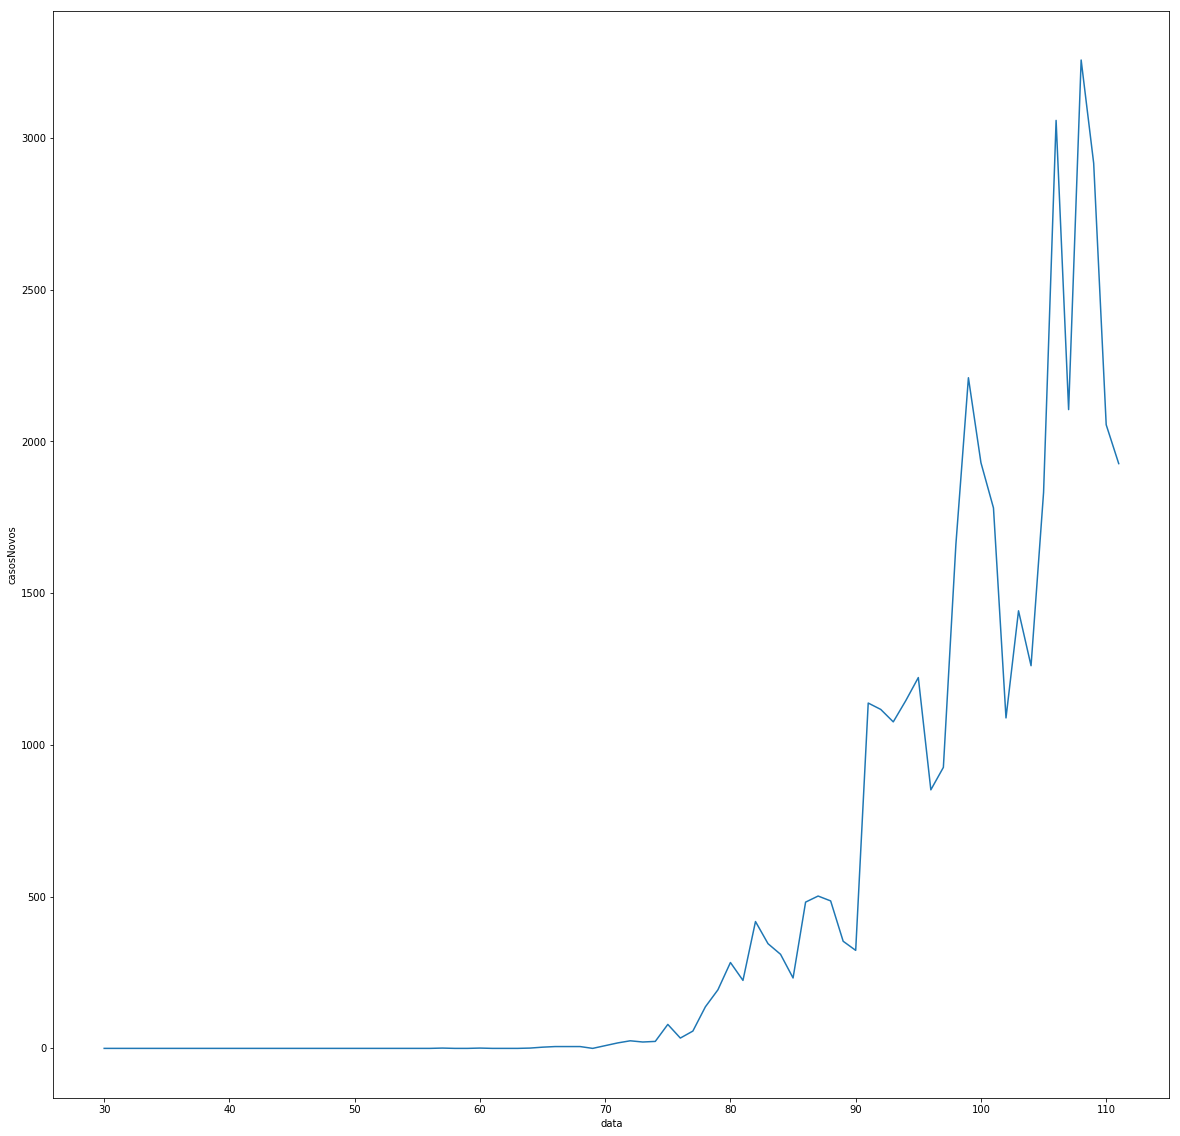

In [7]:
%matplotlib inline
plt.figure(figsize=(20,20))
series = new_cases.copy()
_df = pd.DataFrame(index=series.index)
_df['casosNovos'] = series
_df.reset_index(inplace=True)
_df['data'] = _df['data'].apply(lambda x: x.dayofyear)
sns.lineplot(x='data', y='casosNovos', data=_df, ci=60);


In [8]:
def plot_ts(series):
    res = sm.tsa.adfuller(series.dropna(), regression='ct')
    print('p-value:{}'.format(res[1]))
    
    fig, ax = plt.subplots(3, 2, figsize=(15, 17));
    _df = pd.DataFrame(index=series.index)
    _df['casosNovos'] = series
    _df['x'] = series.index
    sns.lineplot(x='x', y='casosNovos', data=_df, ci=90, err_style='band');
#     ax[0, 0].set_title('time series')
    
    plot_acf(series.dropna(), ax=ax[0, 1], lags=int(len(series)/2))
    ax[0, 1].set_title('acf')
    
    plot_pacf(series.dropna(), ax=ax[1, 1], lags=int(len(series)/2))
    ax[1, 1].set_title('pacf')
    
    series.plot.hist(bins=20, ax=ax[1, 0]);
    ax[1, 0].set_title('distribution')
    
    series.rolling('15D').std().plot(ax=ax[2, 0]);
    ax[2, 0].set_title('rolling std')
    
    series.rolling('15D').mean().plot(ax=ax[2, 1]);
    ax[2, 1].set_title('rolling mean');
    

In [9]:

def plot_decomposition(series):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(17,8), sharex=True)
    res = seasonal_decompose(new_cases, model='aditive', freq=15)
    res.trend.plot(ax=ax1)
    res.resid.plot(ax=ax2)
    res.seasonal.plot(ax=ax3)

    ax1.set_title('Trend');
    ax2.set_title('Residual');
    ax3.set_title('Seasonality');
    return res

In [10]:
ts1 = new_cases.copy()
ts2 = new_cases.diff()

## Serie temporal sem tratamento

p-value:1.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


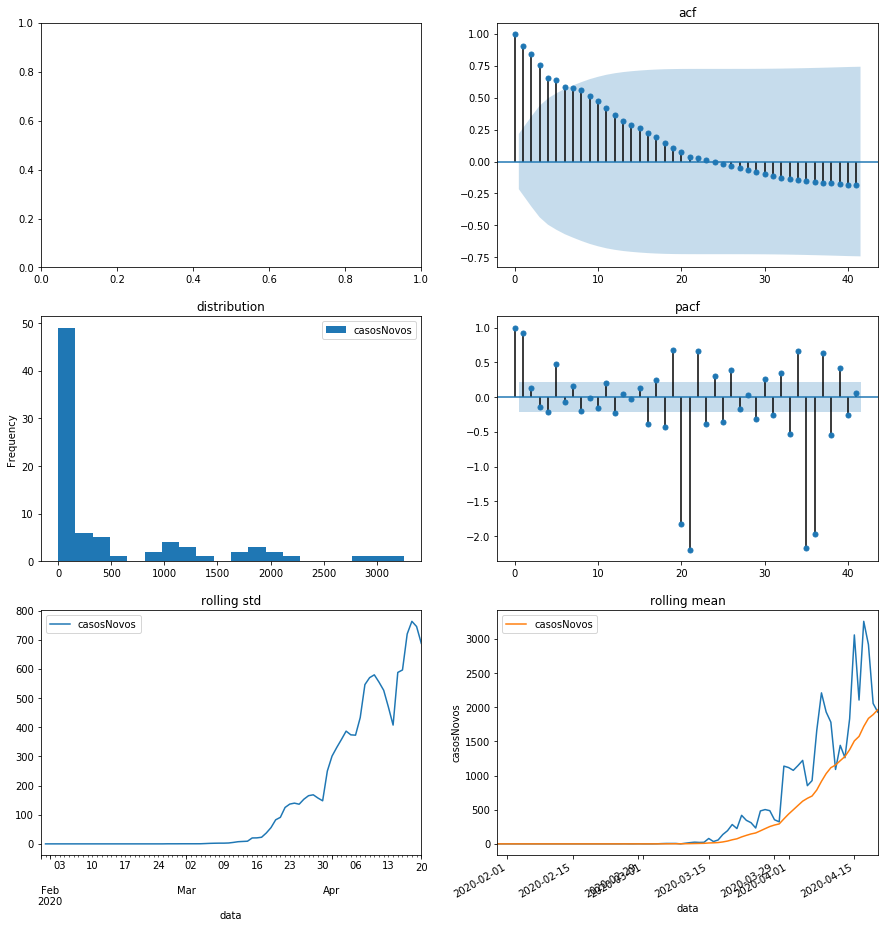

In [11]:
plot_ts(ts1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


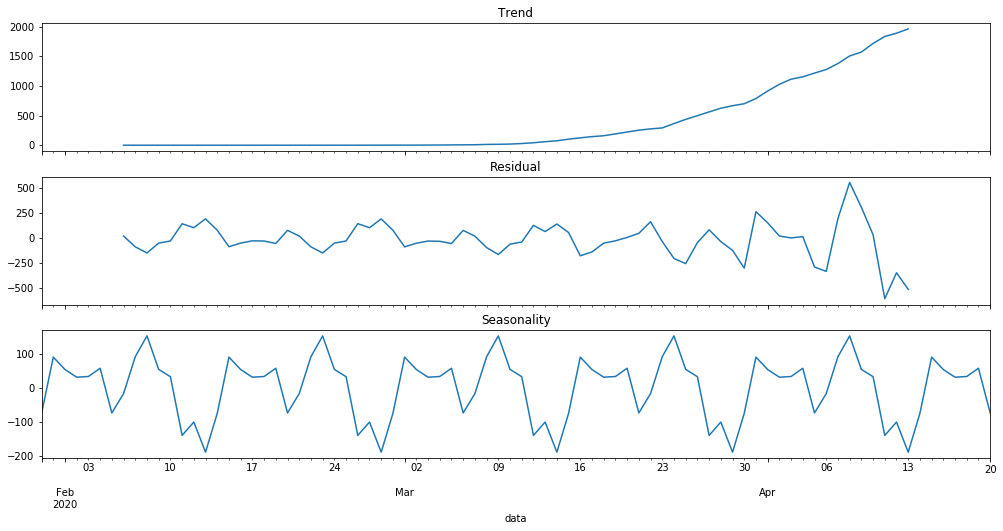

In [12]:
ts1_res = plot_decomposition(ts1);

p-value:7.559417086660262e-07


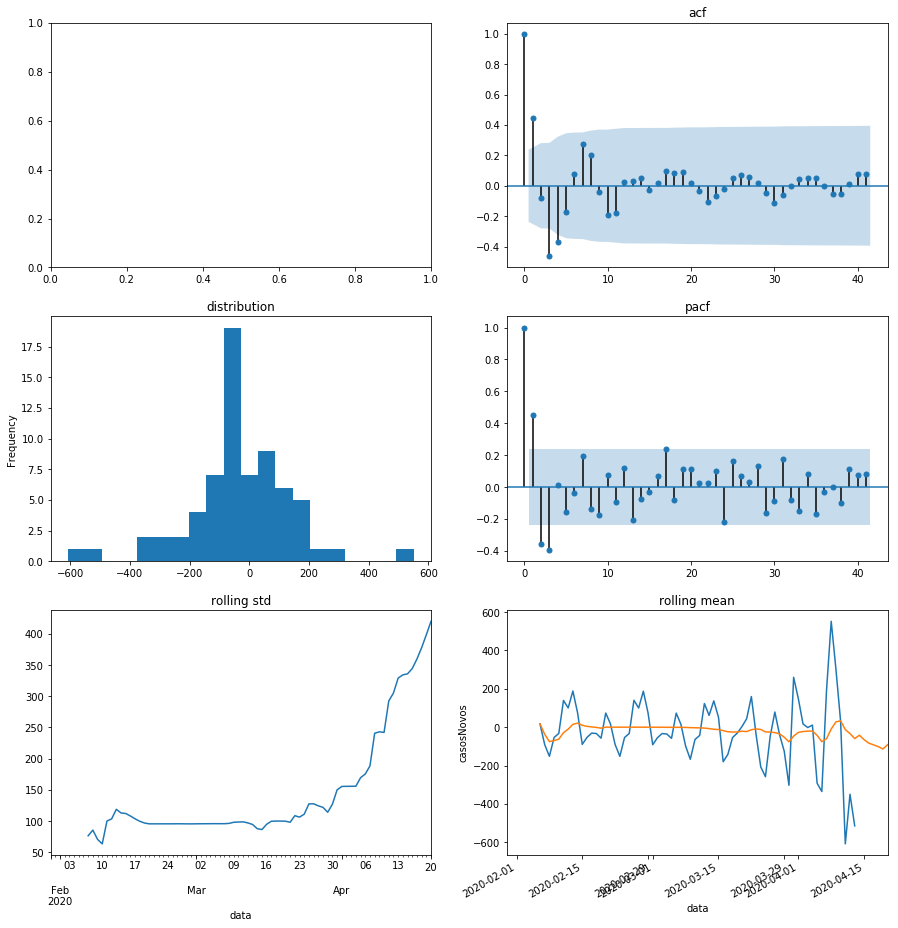

In [13]:
plot_ts(ts1_res.resid)

## Primeira diferença da serie temporal

p-value:1.1613247192464928e-13


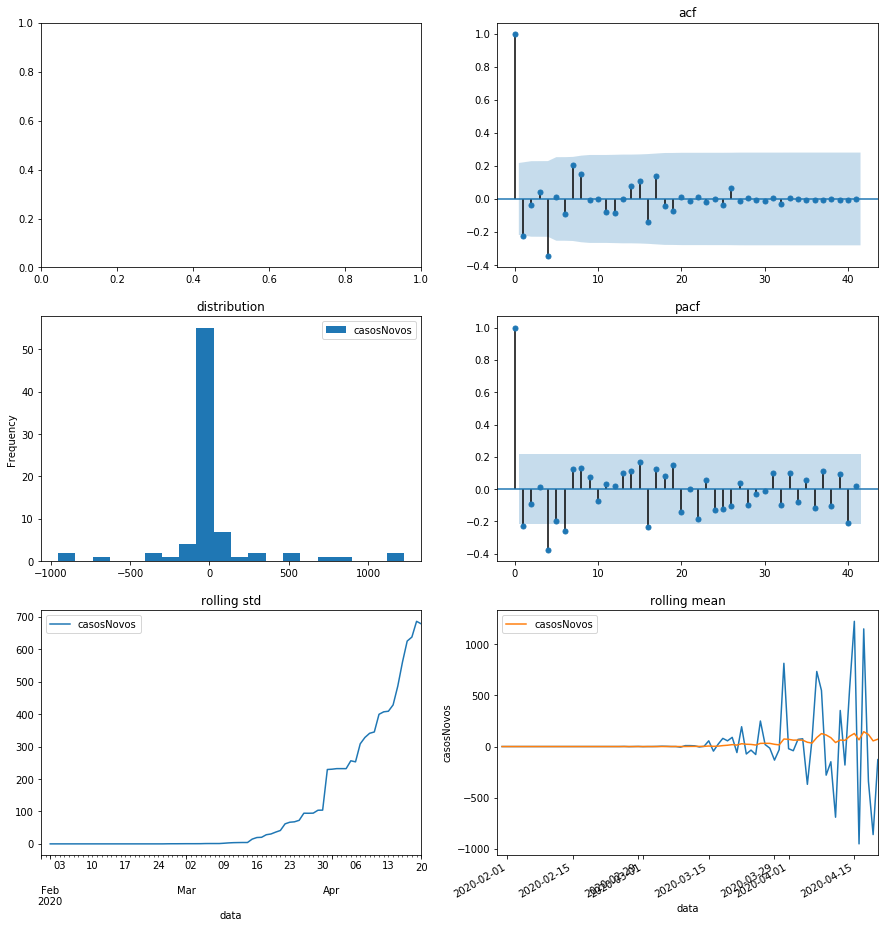

In [14]:
plot_ts(ts2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


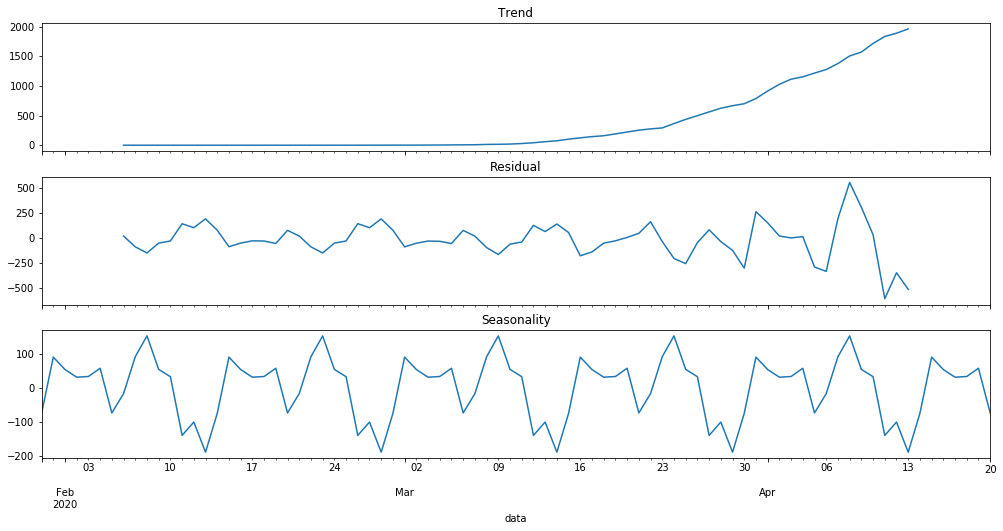

In [15]:
ts2_res = plot_decomposition(ts2);

p-value:7.559417086660262e-07


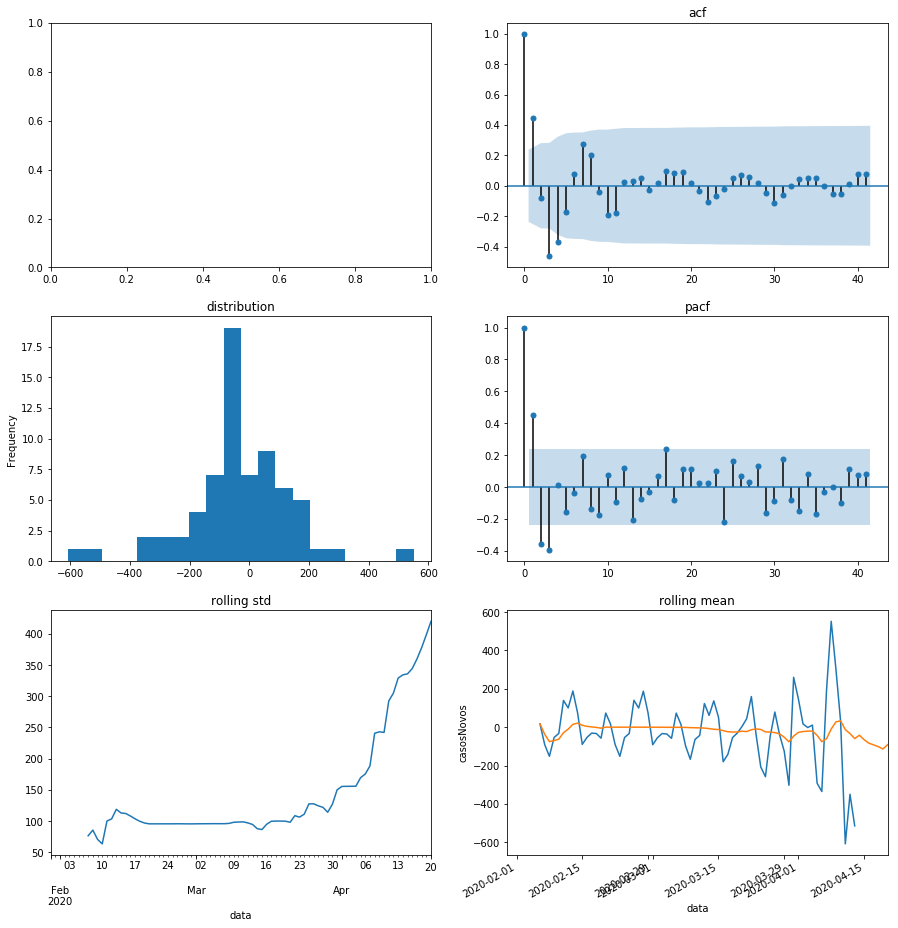

In [16]:
plot_ts(ts2_res.resid)

## Retirando parte inicial da serie que não houveram casos
#### Após os 100 primeiros casos

In [17]:
first_100 = np.where(ts1.cumsum() >= 100)[0][0]
ts3 = ts1[first_100:]
ts3.size

38

p-value:0.001044924661978559


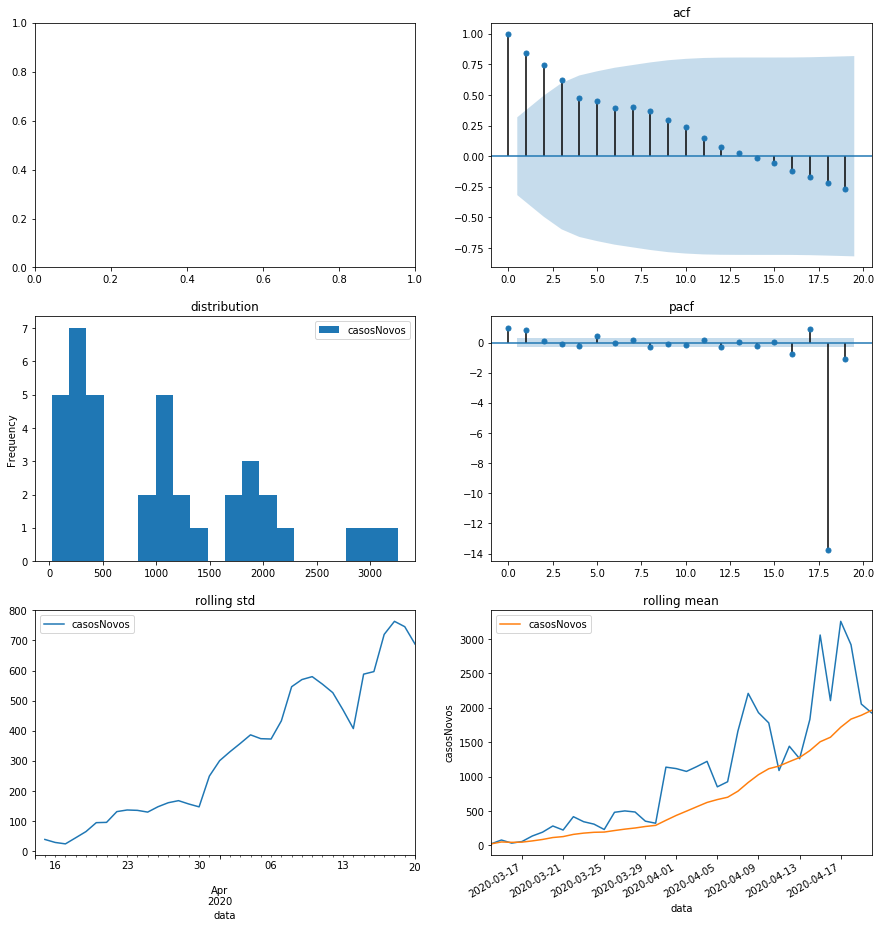

In [18]:
plot_ts(ts3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


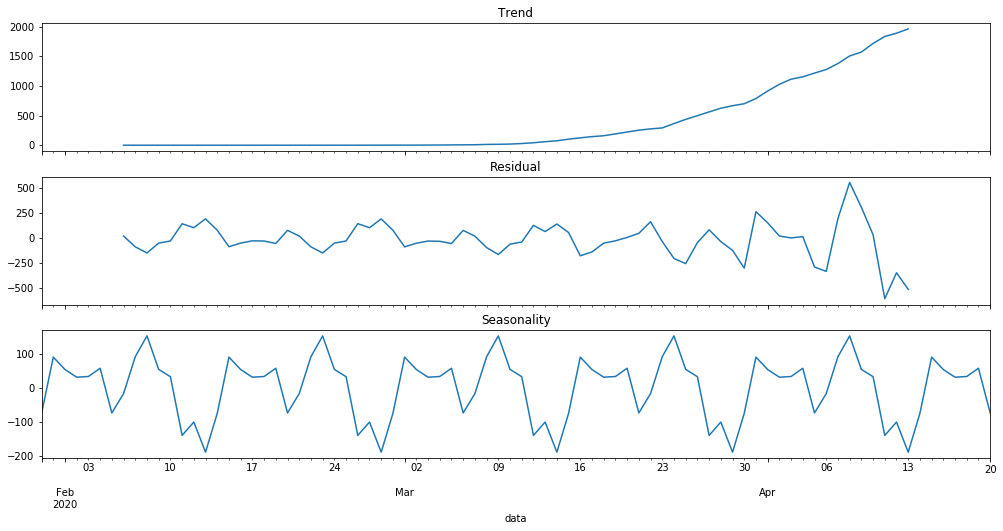

In [19]:
ts3_res = plot_decomposition(ts3);

p-value:7.559417086660262e-07


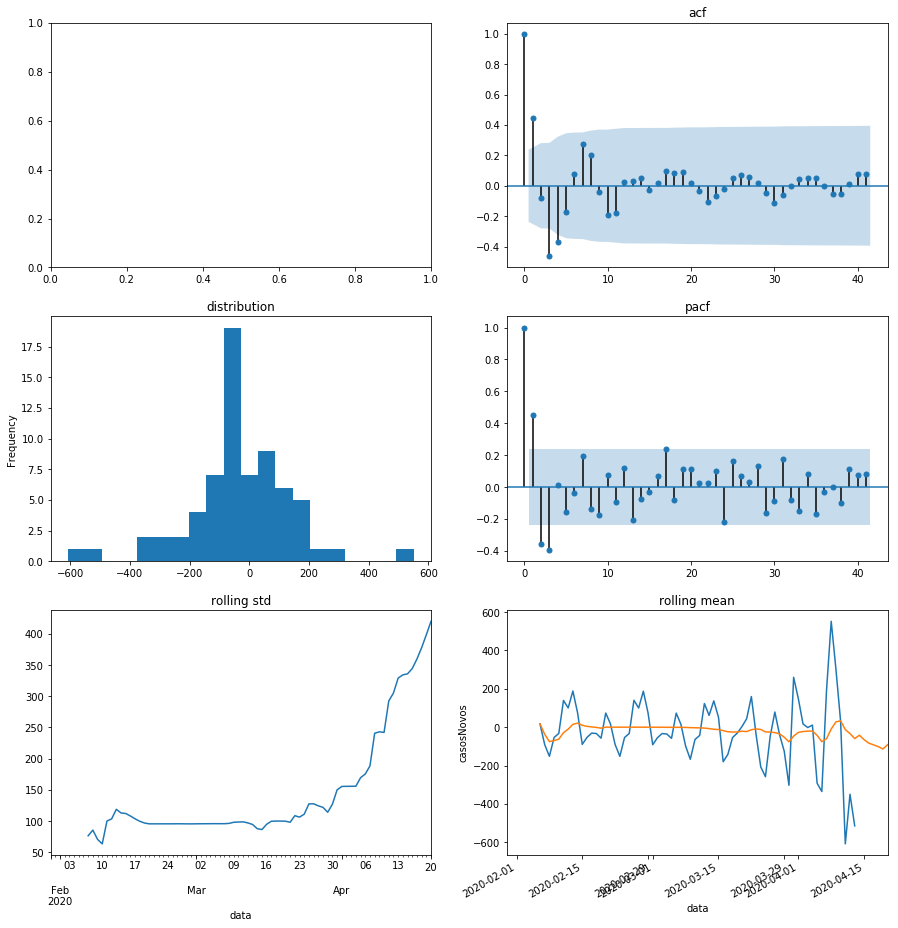

In [20]:
plot_ts(ts3_res.resid)

## Primeira diferença da serie a partir do 100ø caso

In [21]:
ts4 = ts3.diff()

p-value:3.2390744000256616e-06


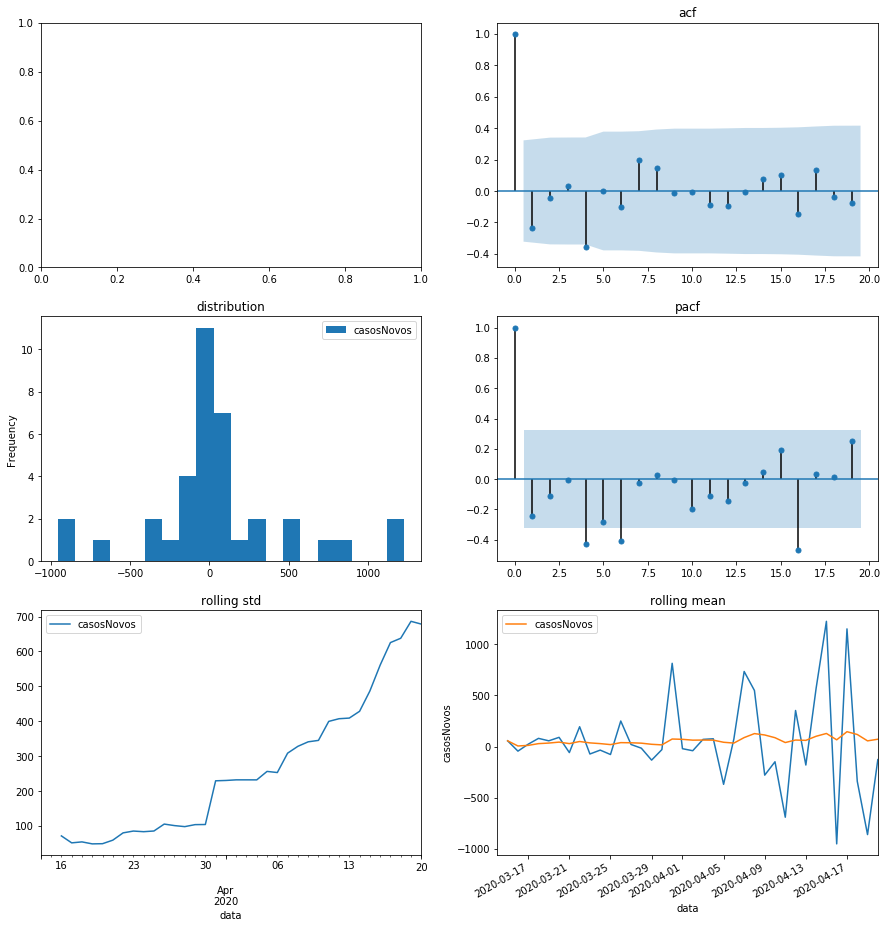

In [22]:
plot_ts(ts4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


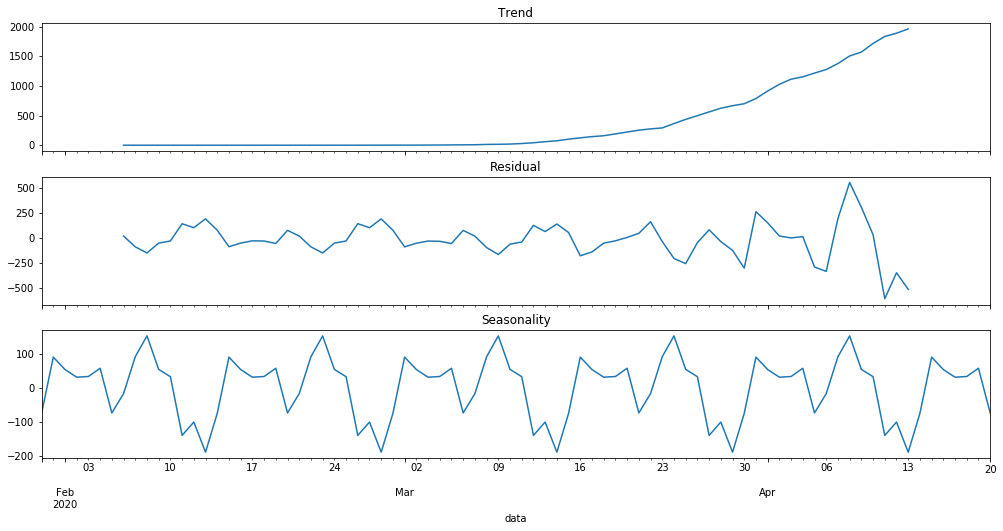

In [23]:
ts4_res = plot_decomposition(ts4);

p-value:7.559417086660262e-07


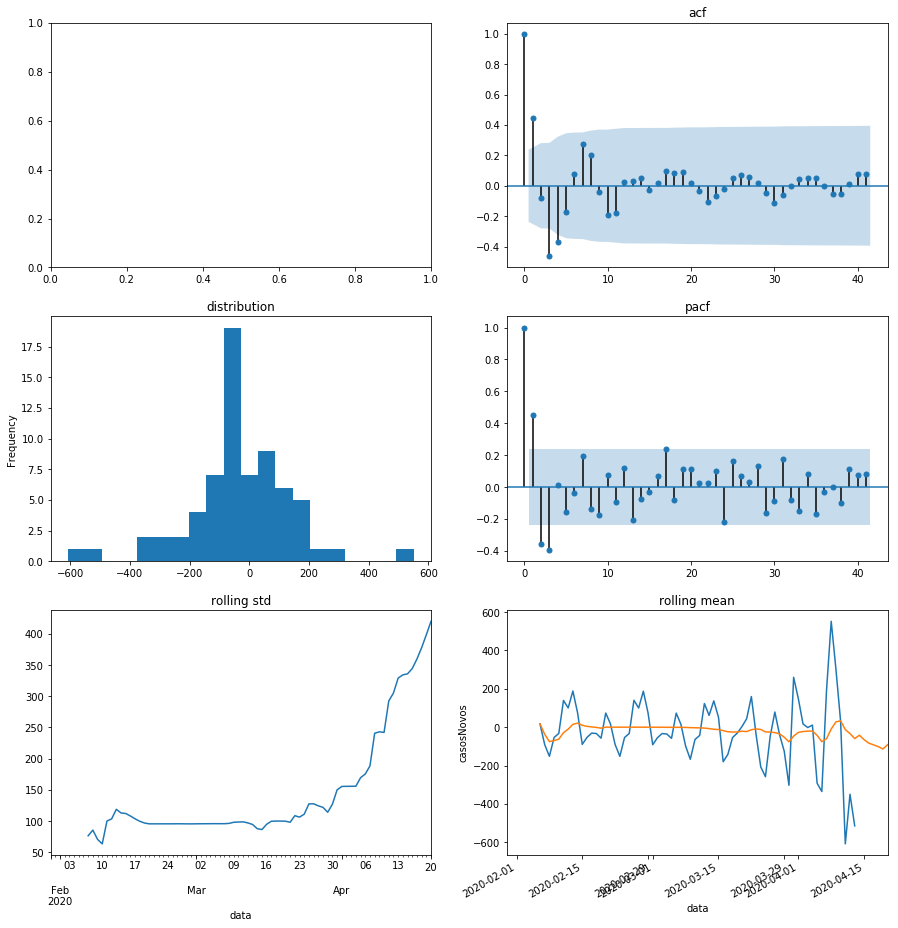

In [24]:
plot_ts(ts4_res.resid)

p-value:0.030975049156166765


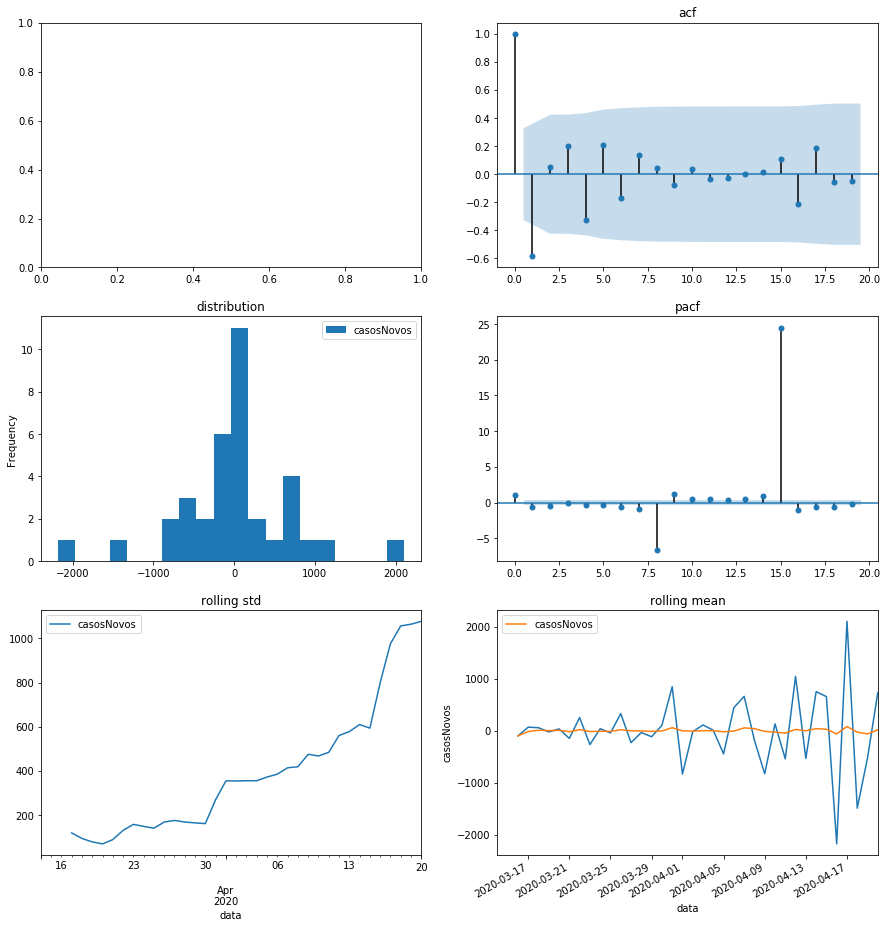

In [25]:
ts5 = ts4.diff()
plot_ts(ts5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


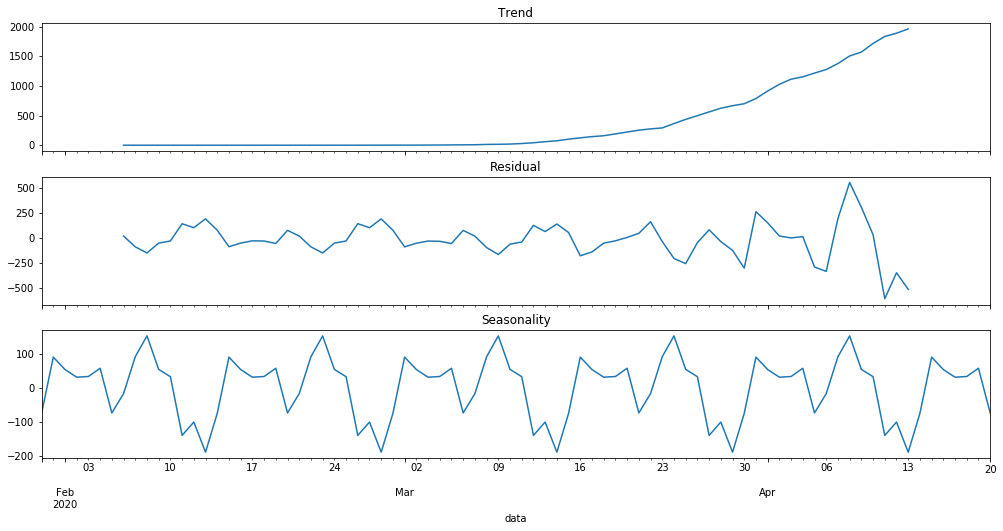

In [26]:
ts5_res = plot_decomposition(ts5);

## Verificando estacionariedade
ADF teste

In [27]:
series = {
    'raw': ts1,
    'raw_resid': ts1_res.resid, 
    'diff1': ts2,
    'diff1_resid': ts2_res.resid, 
    'before_100': ts3,
    'before_100_resid': ts3_res.resid, 
    'before_100_diff1': ts4, 
    'before_100_diff1_resid': ts4_res.resid, 
    'before_100_diff2': ts5,
    'before_100_diff2_resid': ts5_res.resid
}

for name, s in series.items():
    res = sm.tsa.adfuller(s.dropna(), regression='ct')
    print('{} | p-value:{}'.format(name, res[1]))
    

raw | p-value:1.0
raw_resid | p-value:7.559417086660262e-07
diff1 | p-value:1.1613247192464928e-13
diff1_resid | p-value:7.559417086660262e-07
before_100 | p-value:0.001044924661978559
before_100_resid | p-value:7.559417086660262e-07
before_100_diff1 | p-value:3.2390744000256616e-06
before_100_diff1_resid | p-value:7.559417086660262e-07
before_100_diff2 | p-value:0.030975049156166765
before_100_diff2_resid | p-value:7.559417086660262e-07


In [75]:
ts = series['before_100_diff1'].dropna().rolling('15d').mean()
ts

,casosNovos
data,
2020-03-15,56.000000
2020-03-16,5.500000
2020-03-17,11.333333
2020-03-18,28.500000
2020-03-19,34.000000
2020-03-20,43.333333
2020-03-21,28.714286
2020-03-22,49.375000
2020-03-23,35.777778


In [76]:
tr_start,tr_end = '2020-03-15', '2020-04-14'
te_start,te_end = '2020-04-15', '2020-04-20'
tra = ts[tr_start:tr_end].dropna()
tes = ts[te_start:te_end].dropna()

In [77]:
print(len(ts), len(tra), len(tes))

37 31 6


In [78]:
resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=4, max_ma=4, ic='aic', trend='c')
print('ARMA(p,q) =', resDiff['aic_min_order'],'is the best.')

/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/vittorfp/.local/lib/python3.6/site-packages/

ARMA(p,q) = (0, 2) is the best.


/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [120]:
arima = sm.tsa.statespace.SARIMAX(tra,order=(0,0,2), freq='D', seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

/home/vittorfp/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             casosNovos   No. Observations:                   31
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -134.143
Date:                Thu, 23 Apr 2020   AIC                            274.286
Time:                        00:13:38   BIC                            278.283
Sample:                    03-15-2020   HQIC                           275.508
                         - 04-14-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.4150      0.155      9.109      0.000       1.111       1.719
ma.L2          1.1782      0.209      5.647      0.000       0.769       1.587
sigma2       547.7679    214.624      2.552      0.011     127.113     968.423
===================================================================================
Ljung-Box (Q):                       22.94   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.69   Prob(JB):                         0.36
Heteroskedasticity (H):               4.71   Skew:                             0.63
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_start,'2020-05-10')[1:]
# print('ARIMA model MSE:{}'.format(mean_squared_error(ts[1:], pred)))

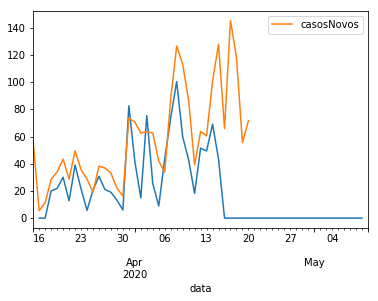

In [122]:
_, ax = plt.subplots()
pred.shift(-1).plot(ax=ax)
ts.plot(ax=ax)